<a href="https://colab.research.google.com/github/Huebr/BuscaLinear/blob/master/projeto1_on_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Programação Não Linear - Primeiro Projeto Computacional
**Universidade Federal do Ceará**
Professor: RICARDO COELHO
Alunos: MARCIO BARROS OLIVEIRA DE SOUZA, 
        PAULINO CARDIAL RABELO e 
        PEDRO JORGE DE ABREU FIGUEREDO

#Introdução

Este trabalho consiste no desenvolvimento computacional de métodos de busca linear usados em otimização não-linear. Dentre eles apresentamos o Método de Newton, Seção Áurea e Método de Armijo (Condição de Armijo). Primeiramente, apresentamos um pouco sobre o ambiente computacional usado. Em seguida, mostramos a implementação dos métodos em conjunto com um breve resumo de cada um deles. Nas seções "Modo de Usar" e "Parâmetros dos Métodos" mostramos como chamar os métodos e quais os parâmetros implementados. Por fim, fazemos um análise simples encima de um conjunto de dados disponibilizados para o desenvolvimento desta atividade.


#Instalação Ambiente

No desenvolvimento desta atividade íremos utilizar Julia como linguagem de implementação pelo seu facil uso e vasto conjunto de bibliotecas que oferecem suporte a otimização matemática. Para facilitar a distribuição fornecemos um notebook Jupyter que colocamos pode ser usado no Colab Google. Veja que facilmente podemos exportar o mesmo para o uso local.

Para podermos executar corretamente no ambiente Colab temos que executar a seguinte célula e reiniciar a aba do navegador aplicando "F5" quando a célula terminar de instalar o kenerl Julia. No caso do uso local basta ter a aplicação Jupyter Notebook (,no Windows Anaconda) e uma distribuição Julia 1.4.2 ou mais recente.

In [ ]:
# Installation cell
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


#Dependências

As depências a seguir devem ser instaladas para permitir importar as bibliotecas que são usadas neste trabalho.

In [ ]:
#Julia 1.4 Environment
using Pkg
pkg"add ForwardDiff; precompile;"
pkg"add Plots; precompile;"
pkg"add PyPlot; precompile;"

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed OpenSpecFun_jll ────────────── v0.5.3+3
  Installed CompilerSupportLibraries_jll ─ v0.3.3+0
  Installed DiffResults ────────────────── v1.0.2
  Installed NaNMath ────────────────────── v0.3.4
  Installed MacroTools ─────────────────── v0.5.5
  Installed DiffRules ──────────────────── v1.0.1
  Installed ForwardDiff ────────────────── v0.10.12
  Installed StaticArrays ───────────────── v0.12.4
  Installed CommonSubexpressions ───────── v0.3.0
  Installed SpecialFunctions ───────────── v0.10.3
######################################################################### 100.0%
######################################################################### 100.0%
   Updating `~/.julia/environments/v1.4/Project.toml`
  [f6369f11] + ForwardDiff v0.10.12
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [e66e0078] + CompilerSupportLibraries_jll v0.3.3+0
  [163ba53b] + DiffResults v1.0.2
  [b552c78f] + DiffRule

<h1>Método Principal</h1>

Os métodos que seram implementados consistem em dados uma função $f:\mathcal{R}^n\to\mathcal{R},x \in \mathcal{R}^n$ e $d \in \mathcal{R}^n$ encontrar um tamanho de passo $\alpha \in \mathcal{R}^{+}$ tal que $f(x+\alpha d) < f(x)$. Não somente isso, mas o ideal seria encontrar um valor de $\alpha$ que minimiza $f(x+\alpha d)$.

In [ ]:
#função de busca linear
function linear_search(f::Function,x::Vector,d::Vector,method::Function)
    ϕ = t->f(x+t*d)
    α = method(f,x,d)
    return (ϕ(α),x+α*d)
end

linear_search (generic function with 1 method)

<h1>Funções Auxiliares</h1>

Durante a implementação usamos uma biblioteca para calcular derivadas e gradientes através da técnica  de "Automatic Differentiation". Essa permite calcular com precisão e agilidade os métodos aqui utilizados. Além disso, usamos o framework Plots em conjunto com a engine PyPlot para gerar gráficos das funções testadas. 



In [ ]:
import ForwardDiff  # calcula derivadas usando automatic differentiation in forward mode
using LinearAlgebra #adiciona operações de algebra linear
using Plots

pyplot()#usa PyPlot como backend engine
∇ = (h,x)->ForwardDiff.gradient(h,x) #gradiente de h(x)
Hessian = (h,x)->ForwardDiff.hessian(h,x) # hessian de h(x)
Df = (h,x)->ForwardDiff.derivative(h,x);  # primeira derivada de h'(x)
D_2f = (h,x)->ForwardDiff.derivative(z->ForwardDiff.derivative(h,z),x) # segunda derivada h"(x)

#11 (generic function with 1 method)

# **Métodos**

Os métodos a serem estudados aqui serão métodos que tem como objetivo obter $x$ tal que minimize ou reduza o valor de uma função dada, nesses métodos as funções a serem minimizadas serão funções unidimensionais, em outras palavras são funções com apenas uma variável.

# **Seção Aurea**

O método da seção áurea não necessita do uso de derivada, logo para seu
funcionamento é necessário de um intervalo de incerteza onde o ponto mínimo esteja
localizado, e que a função seja unimodal nesse intervalo.

\

Definição:

$f:\mathbb{R}\rightarrow\mathbb{R}$ é unimodal em $I$ se existe um mínimo $\alpha^*$ de $f$ em $I$, onde $f$ é não-decrescente em $x>\alpha$, e não-crescente em $x<\alpha$.

\

Então primeiramente precisamos
obter o intervalo, onde se supõe que tenha as características já mencionadas, para
isso percorremos reta real com os valores $a$ e $b$, com $a< b$ de modo que iremos parar quando acharmos um valor
entre $(a,b)$ tal que tenha um valor objetivo menor que os de $a$ e $b$.

<div>


Obtido o intervalo
de incerteza, é usado a razão áurea para dividir em três partes$[a,b]=[a,\alpha]\cup]\alpha,\beta[\cup[\beta,b]$, de modo que as
partes extremas tenham mesmo tamanho. Podemos então diminuir o intervalo $[a,b]$ usando o teorema de funções quase
convexa para descartar uma das partes extremas desse intervalo e formar um outro da mesma forma
do anterior, e assim esse processo se repetirá ate o tamanho do intervalo ser menor
que um certo parâmetro.

\

Teorema:

Seja $f:\mathbb{R}\rightarrow\mathbb{R}$ estritamente quase-convexa sobre o intervalo $[a,b]$. seja $\alpha,\beta\in[a,b]$ tal que $\alpha<\beta$
1. Se $f(\alpha)>f(\beta)$, então $f(z)\geq f(\beta)$, $\forall z\in [a,\alpha)$
2. Se $f(\alpha)\leq f(\beta)$, então $f(z)\geq f(\alpha)$, $\forall z\in (\beta,b]$

sendo $\alpha=a+\frac{3-\sqrt5}{2}(b-a)$ e $\beta=a+(1-\frac{3-\sqrt5}{2})(b-a)$ pela seção áurea.

\

Exemplo:

Pelo teorema anterior poderíamos excluir o intervalo em vermelho que o intervalo resultante continuaria unimodal.

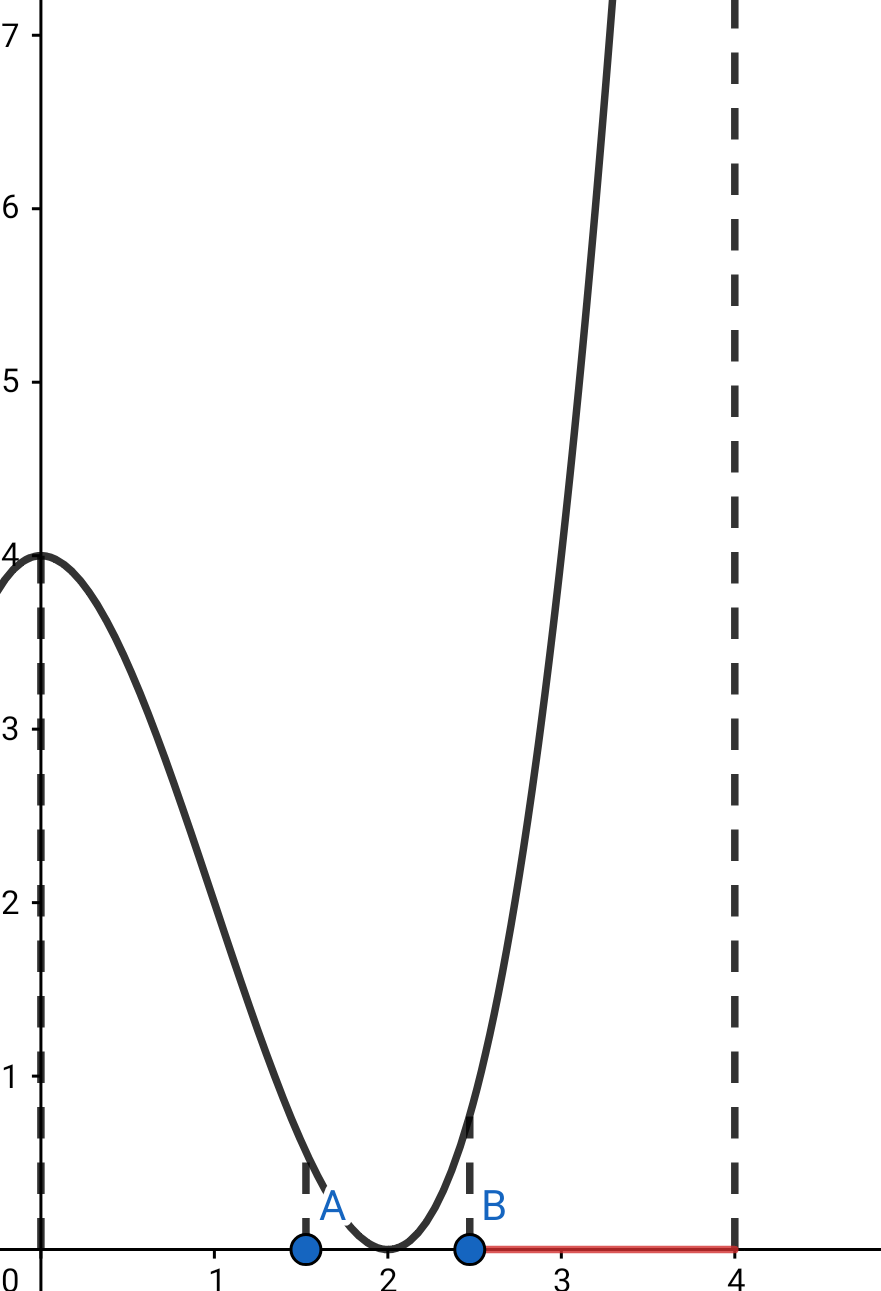

In [ ]:
function secao_aurea(f::Function,x::Vector,d::Vector;φ::Function = t->f(x+t*d),ρ = 1/2,ϵ = 1e-9)::Float64
    θ_1 = (3 - sqrt(5))/2.0
    θ_2 = (sqrt(5) - 1)/2.0
    #Obtenção intervalo
    a=0
    b=2*ρ
    s = b / 2
    while(φ(b)<φ(s))
        a = s
        s = b
        b *= 2
    end
    #Obtenção de t
    u = a + θ_1*(b - a)
    v = a + θ_2*(b - a)
    while(b - a > ϵ)
        if(φ(u)<φ(v))
            b = v
            v = u
            u = a + θ_1*(b - a)
        else
            a = u
            u = v
            v = a + θ_2*(b - a)
        end
    end
    return (u+v)/2
end

function secao_aurea(f::Function,x::Vector,d::Vector,(a,b)::Tuple{Float64,Float64};φ::Function = t->f(x+t*d),ϵ = 1e-9)::Float64
    θ_1 = (3 - sqrt(5))/2.0
    θ_2 = (sqrt(5) - 1)/2.0
    #Obtenção de t
    u = a + θ_1*(b - a)
    v = a + θ_2*(b - a)
    while(b - a > ϵ)
        if(φ(u)< φ(v))
            b = v
            v = u
            u = a + θ_1*(b - a)
        else
            a = u
            u = v
            v = a + θ_2*(b - a)
        end
    end
    return (u+v)/2
end

secao_aurea (generic function with 2 methods)

In [ ]:
#exemplo 4.5 livro
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],secao_aurea)

(0.36363636363636365, [2.363636358633485, 0.45454545287782844])

# **Método de Newton**

 O método de Newton é um método iterativo que busca raizes de funções, e será usado para buscar pontos críticos de uma função, sendo tal método aplicado na função derivada. Pois achar um ponto crítico da função é análogo a achar uma raiz da função derivada.
 

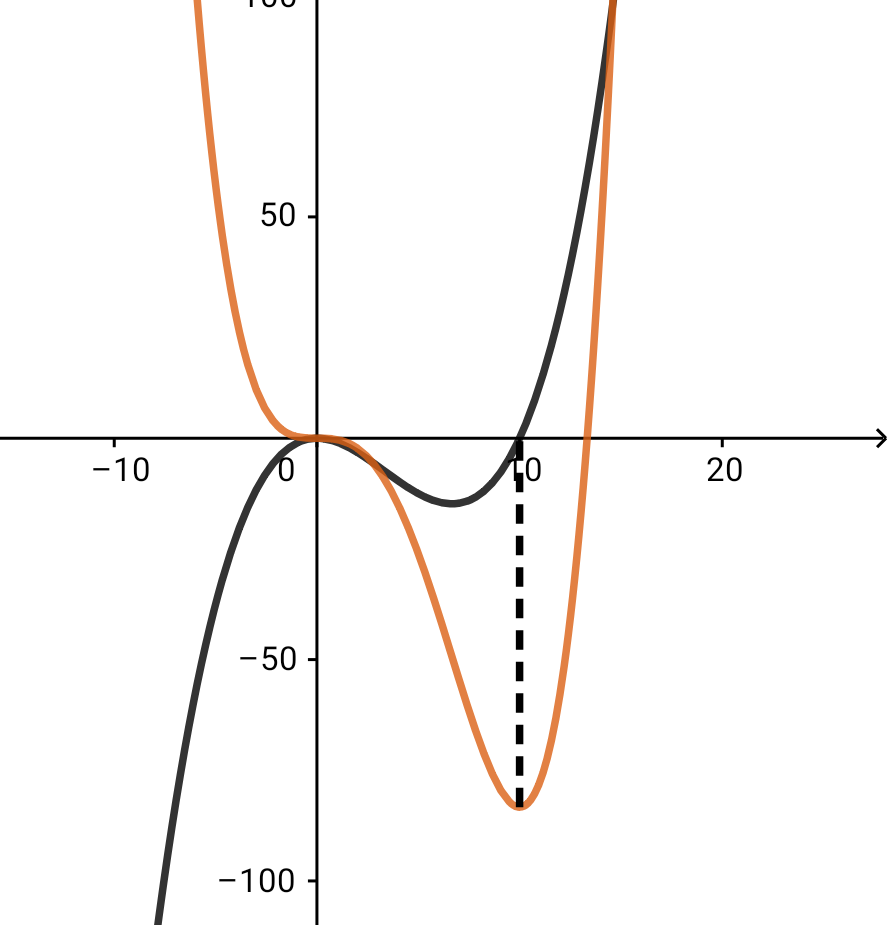

Na imagem podemos ver a função($\frac{x^4}{40}-\frac{x^3}{3}$) de laranja, e sua função derivada($\frac{x^3}{10}-x^2$) de preto.

O método se baseia na construção de uma sequência de pontos, a partir de um ponto inicial, onde essa sequência deve convergir para raiz da função derivada, ou seja, um ponto crítico da função. A sequência será construída de forma que o próximo ponto vai ser dado como raiz da reta tangente do ponto atual.

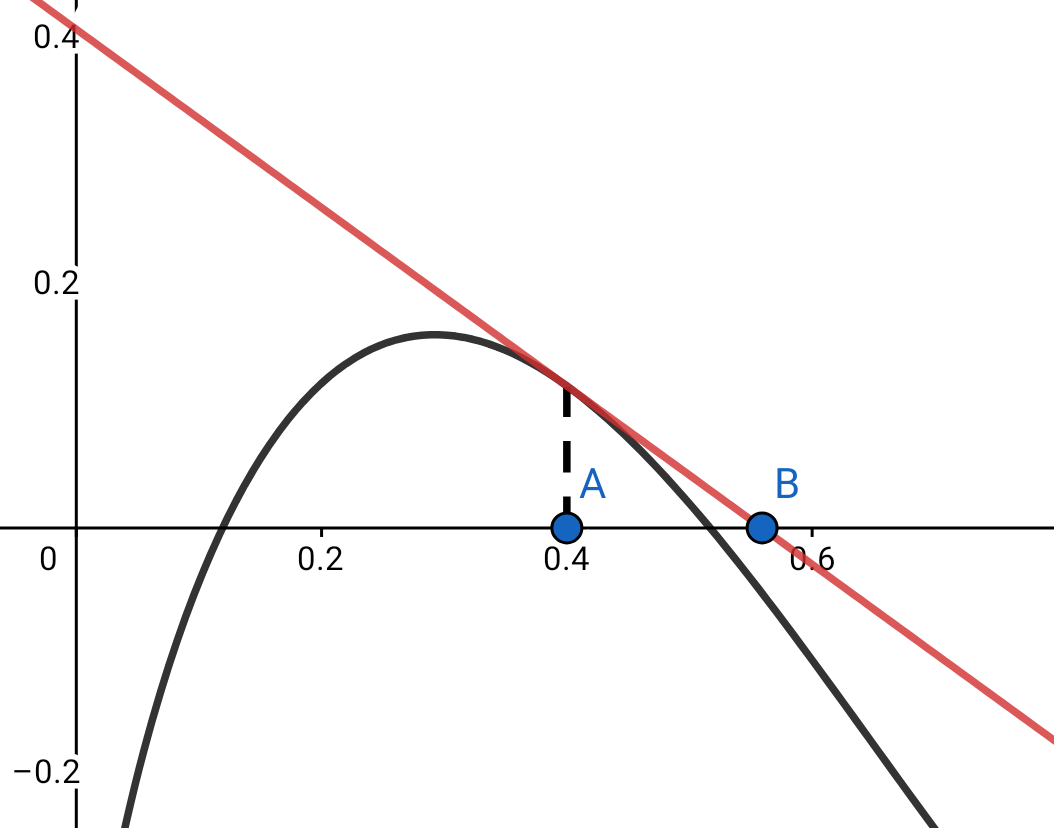

Na figura podemos ver de vermelho a reta tangente de A, na qual foi construída para se obter B.

Vamos construir a sequência de pontos.
Construindo a reta tangente obtemos
\begin{equation}
    (Y-\frac{d f(X_{k})}{d X})=\frac{d^{2} f(X_{k})}{d^{2} X}.(X-X_{k})
\end{equation}
Sendo $(X,Y)=(X_{k+1},0)$, logo concluímos que
\begin{equation}
    X_{k+1}=X_{k}-\frac{\frac{d f(X_{k})}{d X}}{\frac{d^{2} f(X_{k})}{d^{2} X}}
\end{equation}
Assim obtemos a sequência de pontos do método iterativo de Newton.

Algo
a se observar é que a convergência do método depende do ponto inicial, portanto se
for dado um ponto inicial suficientemente próximo do ponto crítico e que a derivada
segunda do ponto crítico não seja zero, então a convergência será no mínimo
quadrada.

Exemplo:

Na próxima imagem temos o método de newton sendo aplicado a função derivada com ponto inicial A=1. Nesse caso ele convergiu para inflexão(X=0) em vez de convergir para o mínimo(X=10), pois o ponto inicial dado é próximo do ponto de inflexão e não do ponto mínimo.

<div>
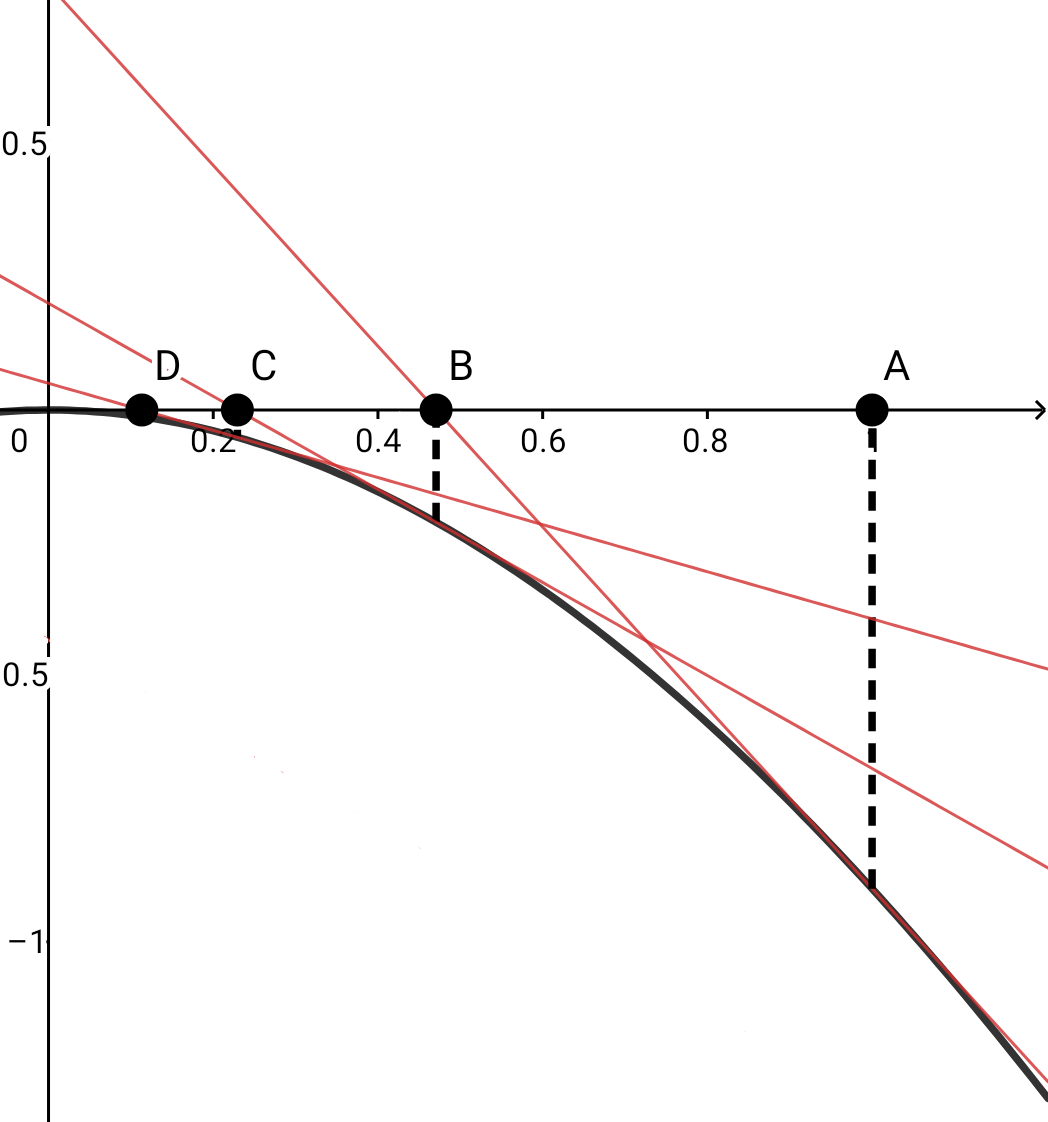
</div> 




In [ ]:
function newton(f::Function,x::Vector,d::Vector;φ::Function = y->f(x+y*d),t::Float64=0.25,ϵ = 1e-9,n_iter=10000)::Float64
   iter = 0
   while (abs(Df(φ,t)) > ϵ && iter < n_iter)
         t = t - (Df(φ,t)/D_2f(φ,t))
         iter = iter + 1
   end 
   return t
end

newton (generic function with 1 method)

In [ ]:
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],newton)

(0.36363636363636365, [2.3636363636363638, 0.4545454545454546])

# **Método de Armijo**

  Este método é inexato, logo ele não tenta minimizá-la, mas sim encontrar ao longo da direção de descida $d$ um
ponto $t^*>0$ qualquer que satisfaça a desigualdade de Armijo, oferecendo uma boa redução na função.

\

\begin{equation}
    f(x^*+t^*d)\leq f(x^*)+\eta t^*\nabla f(x^*)^{T}d
\end{equation}

\

A desigualdade diz que a redução na
função tem que ser proporcional ao tamanho do passo.

Pelo próximo teorema podemos ter a certeza que podemos obter tal tamanho de passo t, para satisfazer tal condição.

\

 Teorema

Considere uma função diferenciável $f:\mathbb{R}^n\rightarrow\mathbb{R}$, um ponto $x^*\in\mathbb{R}^n$, uma direção de descida $d\in\mathbb{R}^n$ e $\eta\in(0,1)$. Então existe $\delta>0$ tal que.


\

\begin{equation}
        f(x^*+td)\leq f(x^*)+\eta t\nabla f(x^*)^{T}d
    \end{equation}
        $\forall t\in(0,\delta)$
        
\

  Assim fixado os parâmetros,
fazemos verificações com os pontos sucessivamente diminuindo o tamanho do passo
ate acharmos um ponto que satisfaça.

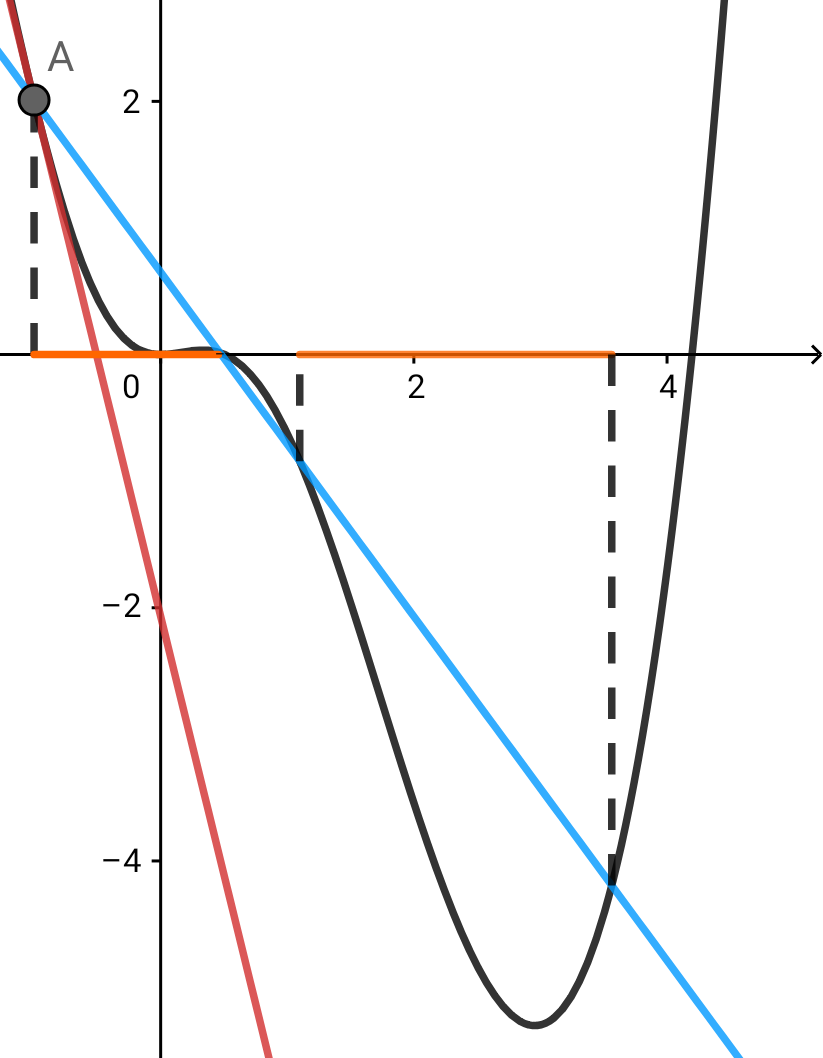

Na imagem anterior podemos ver um exemplo onde os intervalos laranjas são os intervalos dos pontos t que satisfazem a desigualdade.

In [ ]:
function armijo(f::Function,x::Vector,d::Vector;φ::Function = y->f(x+y*d),t::Float64= 1.0,η::Float64 = 0.25)
    # f(x + td) > f(x) +t(∇f(x)⋅ d)
    while (φ(t)>φ(0)+ η*t*(∇(f,x)⋅d))
      t *=0.8
    end
    return t
end

armijo (generic function with 1 method)

In [ ]:
#exemplo 4.10 livro
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],armijo)

(0.5528000000000003, [2.9200000000000004, 0.6400000000000001])

# Modo de Usar

   Sejam os dados de entrada $x \in \mathcal{R}^n,d \in \mathcal{R}^n,f: \mathcal{R}^n \to \mathcal{R}$. Onde $x$ representa as variáveis de decisão, $f$ a função objetivo e $d$ um vetor direção de descida. Vamos mostrar como chamar os métodos de busca linear para resolver o problema de encontrar um tamanho de passo $\alpha$ tal que $f(x + \alpha d) < f(x)$.Para tanto, iremos utilizar a função chamadora linear_search(). Nessa inserimos os dados de entrada em conjunto com a função para um método de busca linear.


   Considere o seguinte exemplo, seja $f(x_1,x_2)= \frac{1}{2}(x_1 - 2)^2 + (x_2 - 1)^2$, $x = \begin{pmatrix}1 \\0\end{pmatrix}$ e $d  = \begin{pmatrix}3 \\1\end{pmatrix}$. Esses podem ser passados para linear_search da seguinte forma:
 




In [ ]:
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],secao_aurea)

(0.36363636363636365, [2.363636358633485, 0.45454545287782844])



   Onde o primeiro campo da função implementa uma função anônima para representar $f(x)$, com formato <i>(vetores)$\to$ (função expressa)</i>. Devemos utilizar de operações aritméticas padrões sobre um vetor[$i$], que refere-se a coordenada $i$ do vetor(em julia começa de 1 até n), para expressar $f(x)$. Os dois campos seguidos de linear_search fazem referência aos $x,d$ implementados com Array's([$x_1$,$x_2$] e [$d_1$,$d_2$]). 

  No último campo temos uma função referenciando o método(no caso seção aurea) usado, temos três referências implementadas secao_aurea, armijo e newton. Elas podem ser chamados da mesma forma do exemplo anterior, que utiliza parâmetros definidos pelo livro-texto da disciplina, ou podemos utilizar funções anonimas para chamar um método customizado da forma <i>$(f,x,d)->$method($f$,$x$,$d$,parametros_adicionais)</i>. Veja o exemplo customizado:







In [ ]:
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],(f,x,d)->armijo(f,x,d,t=0.7,η = 0.5))

(0.363872, [2.344, 0.44799999999999995])

 Na proxima seção discutimos os parâmetros para cada método. A saída do método linear_search retorna uma tupla da forma ($f(x+αd),x+αd$), ou seja, o valor da função objetivo no melhor ponto encontrado e o ponto.

# Parâmetros dos Métodos

   Aqui colocaremos as funções de métodos de busca linear implementado e a descrição sobre seus parâmetros. Parametros depois do caracter ";" são chamados de argumentos palavra-chave. Esses devem vir depois dos argumentos posicionais e da forma (palavra-chave) = valor. Algumas palavras-chave estão em unicode para acessar estas no julia basta escrever da mesma forma que em latex(ex. \epsilon) e pressionar a tecla 'tab', ou seja , $\epsilon$ = \epsilona + tab.


secao_aurea(f::Function, x::Vector, d::Vector; φ::Function = t->f(x+t*d), ρ = 1/2, ϵ = 1e-9)
>  Algoritmo de busca unidimensional exata usando seção aurea para fazer um busca dentro de um intervalo unimodal. Implementa automaticamente um método para tentar encontrar um intervalo unimodal inicial. Caso este não for unimodal não a garantia se o método é exato.
*  φ(\varphi) - função unidimensional definida sobre $f(x)$ que queremos otimizar.
*  ρ(\rho) - valor utilizado para estimar o intervalo inicial (0,2ρ).
*  ϵ(\epsilon) -  tolerância utilizada para verificar convergencia. Com menor precisão mais rápido converge. 


---

secao_aurea(f::Function,x::Vector,d::Vector,(a,b)::Tuple{Float64,Float64}; φ::Function = t->f(x+t*d),ϵ = 1e-9)
> Algoritmo de busca unidimensional exata usando seção aurea para fazer um busca dentro de um intervalo unimodal. Possui como parâmetro inicial uma tupla com o intervalo inicial($a <  b$). Caso este não for unimodal não a garantia se o método é exato.
*  φ(\varphi) - função unidimensional definida sobre $f(x)$ que queremos otimizar.
*  ϵ(\epsilon) -  tolerância utilizada para verificar convergencia. Com menor precisão mais rápido converge. 

---
newton(f::Function, x::Vector, d::Vector; φ::Function = y->f(x+y*d), t::Float64=0.25, ϵ = 1e-9, n_iter=10000)::Float64

> Algoritmo de busca unidimensional usando método de newton para fazer um busca a partir de um tamanho de passo inicial t. Caso este não esteja perto o suficiente do ótimo não a garantia se o método converge.
*  φ(\varphi) - função unidimensional definida sobre $f(x)$ que queremos otimizar.
*  t - passo inicial usado.
*  ϵ(\epsilon) -  tolerância utilizada para verificar convergencia. Com menor precisão mais rápido converge.
* n_iter - número máximo de iterações que o método pode executar.

---
armijo(f::Function,x::Vector,d::Vector;φ::Function = y->f(x+y*d),t::Float64= 1.0,η::Float64 = 0.25)
> Algoritmo de busca unidimensional usando condição de armijo para fazer um busca a partir de um tamanho de passo inicial t. Não garanti proximidade a um minimizador global, porém converge rapidamente.

*  φ(\varphi) - função unidimensional definida sobre $f(x)$ que queremos otimizar.
*  t - tamanho de passo inicial usado.
*  η(\eta) -  fator de redução usado.
---






Todos os métodos retornam um tamanho de passo como um ponto flutuante.

#Testes

Nesta seção definimos as instâncias de testes que usamos e quais os resultados os métodos encontraram.

<h2>Instâncias</h2>
   As instâncias dadas são definidas em termo de função objetivo, valor inicial de $x$ e direção de descida $d$.  Abaixo apresentamos uma lista com os 5 valores entrada usados.
    



1.   <i>instância 1</i>
   *   $f_1(x)=(x_1 -2)^4 + (x_1 - 2x_2)^2$
   *   $x_0 = \begin{pmatrix}0 \\ 3\end{pmatrix}$
   *   $d_0 = \begin{pmatrix}-\nabla f_1(x_0)\end{pmatrix}$
2.   <i>instância 2</i>
   *   $f_2(x)=100(x_2 -x_1^2)^2 + (1 - x_1)^2$
   *   $x_0 = \begin{pmatrix}-1,9\\2\end{pmatrix}$
   *   $d_0 = \begin{pmatrix}-\nabla f_2(x_0)\end{pmatrix}$
3.   <i>instância 3</i>
   *   $f_3(x)=1,5 - x_1(1-x_2)^2 + (2,25 - x_1(1-x_2^2)^2+(2,625-x_1(1-x_2^3))^2$
   *   $x_0 = \begin{pmatrix}0\\0\end{pmatrix}$
   *   $d_0 = \begin{pmatrix}-\nabla f_3(x_0)\end{pmatrix}$
4.   <i>instância 4</i>
   *   $f_4(x)=(x_1 - 2x_2+5x_2^2 - x_2^3 -13)^2 + (x_1 - 14x_2 + x_2^2 + x_2^3 -29)^2$
   *   $x_0 = \begin{pmatrix}15\\-2\end{pmatrix}$
   *   $d_0 = \begin{pmatrix}-\nabla f_4(x_0)\end{pmatrix}$
5.   <i>instância 5</i>
   *   $f_5(x)=100(x_3 - {(\frac{x_1+x_2}{2})}^2)^2 + (1-x_1)^2 + (1-x_2)^2$
   *   $x_0 = \begin{pmatrix}-1,2\\2\\0\end{pmatrix}$
   *   $d_0 = \begin{pmatrix}-\nabla f_5(x_0)\end{pmatrix}$








In [ ]:
#funções objetivo
f1 = x-> (x[1]-2)^4 + (x[1] - 2*x[2])^2
f2 = x-> 100*(x[2]-(x[1])^2)^2 + (1 - x[1])^2
f3 = x-> 1.5 - x[1]*(1-x[2])^2 + (2.25 - x[1]*(1-(x[2])^2))^2 +(2.625 - x[1]*(1-x[2]^3))^2
f4 = x-> (x[1] - 2*x[2]+5*x[2]^2 - x[2]^3 -13)^2 + (x[1] - 14*x[2] + x[2]^2 + x[2]^3 -29)^2
f5 = x-> 100*(x[3] - ((x[1]+x[2])/2)^2)^2 + (1-x[1])^2 + (1-x[2])^2

#valores de x indexado por função
x0 = [[0,3],[-1.9,2],[0,0],[15,-2],[-1.2,2,0]]

#valores de d indexado por função
d0 = [-∇(f1,x0[1]),-∇(f2,x0[2]),-∇(f3,x0[3]),-∇(f4,x0[4]),-∇(f5,x0[5])]

5-element Array{Array{Float64,1},1}:
 [44.0, -24.0]
 [1229.3999999999999, 322.0]
 [10.75, 0.0]
 [-88.0, 2432.0]
 [-8.400000000000002, -14.800000000000002, 32.00000000000001]

<h2>Estimando parâmetros dos métodos</h2>

  Como os dados de entrada são bem conhecidos podemos usar eles para estimar parâmetros para os métodos de busca linear, além dos padrões. Para tanto para cada tipo de instância definimos um intervalo e verificamos seu gráfico.



1.   <i>Instância 1<i>
* $\alpha \in (0,1)$ 

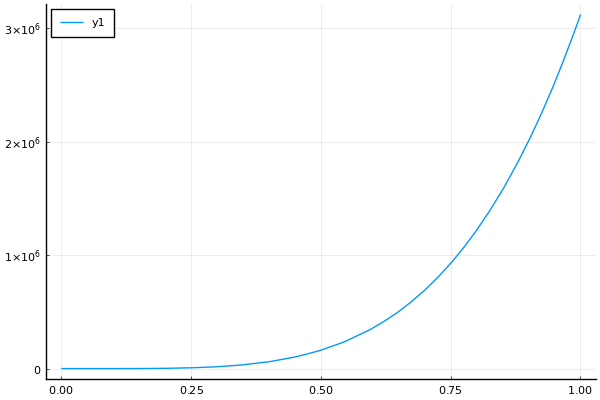

In [ ]:
plot(t->f1(x0[1]+t*d0[1]),0,1)

* $\alpha \in (0,0.25)$ 

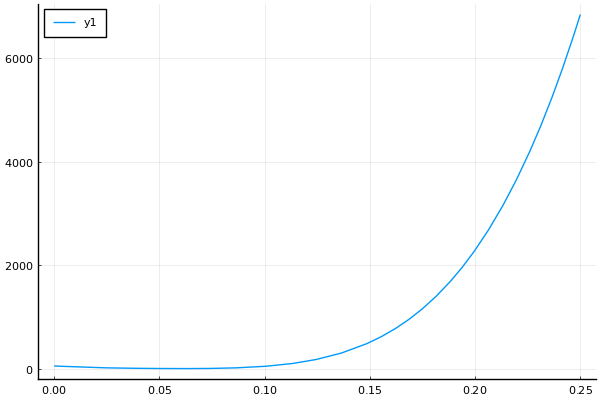

In [ ]:
plot(t->f1(x0[1]+t*d0[1]),0,0.25)

* $\alpha \in (0,0.1)$ 

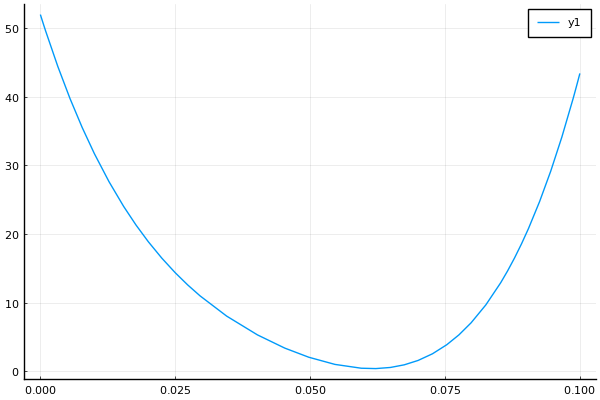

In [ ]:
plot(t->f1(x0[1]+t*d0[1]),0,0.1)

2.   <i>Instância 2<i>
* $\alpha \in (0,1)$ 

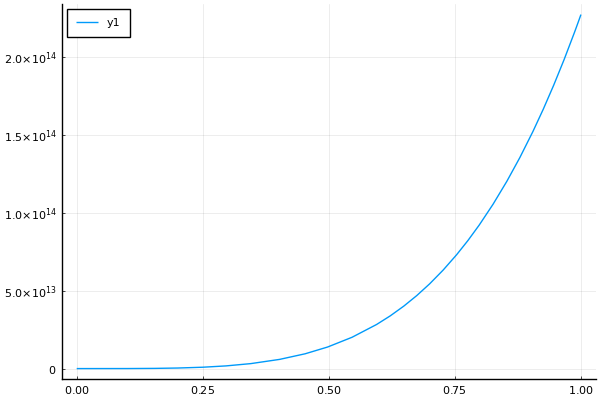

In [ ]:
plot(t->f2(x0[2]+t*d0[2]),0,1)

* $\alpha \in (0,0.25)$ 

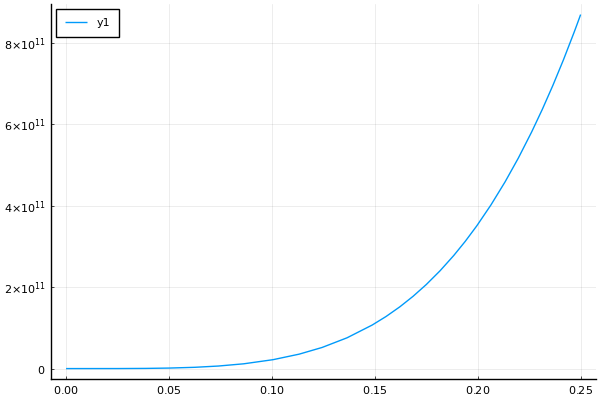

In [ ]:
plot(t->f2(x0[2]+t*d0[2]),0,0.25)

* $\alpha \in (0,0.05)$ 

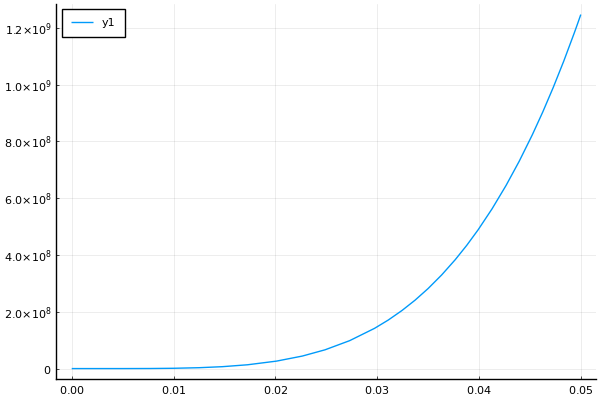

In [ ]:
plot(t->f2(x0[2]+t*d0[2]),0,0.05)

* $\alpha \in (0,0.005)$ 

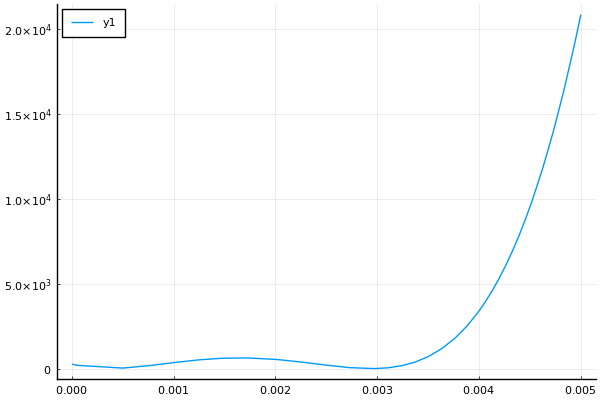

In [ ]:
plot(t->f2(x0[2]+t*d0[2]),0,0.005)

* $\alpha \in (0,0.004)$ 

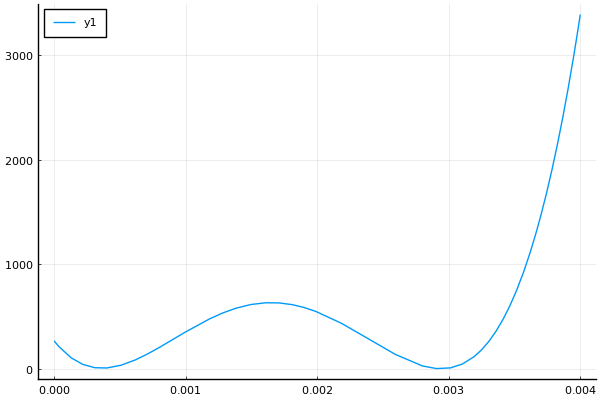

In [ ]:
plot(t->f2(x0[2]+t*d0[2]),0,0.004)

* $\alpha \in (0,0.0035)$ 

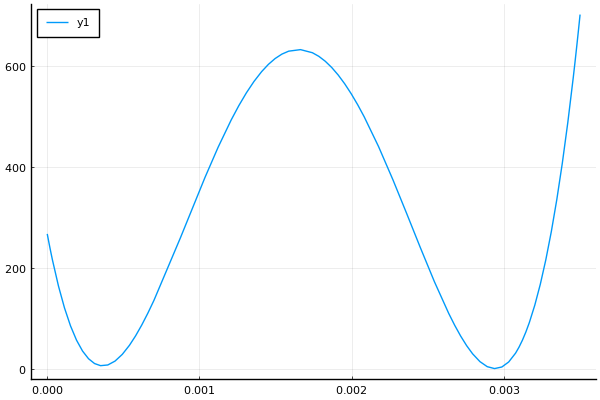

In [ ]:
plot(t->f2(x0[2]+t*d0[2]),0,0.0035)

3.   <i>Instância 3<i>
* $\alpha \in (0,1)$ 

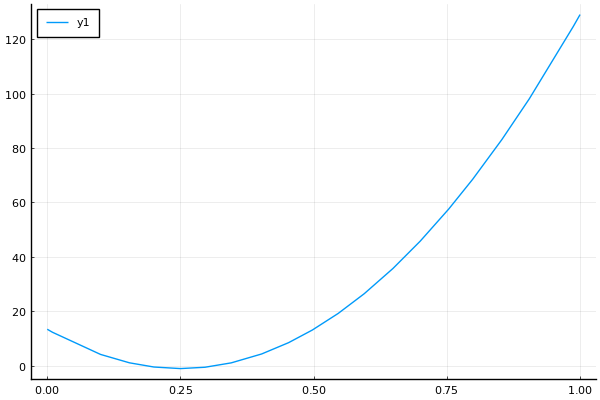

In [ ]:
plot(t->f3(x0[3]+t*d0[3]),0,1)

* $\alpha \in (0,0.4)$ 

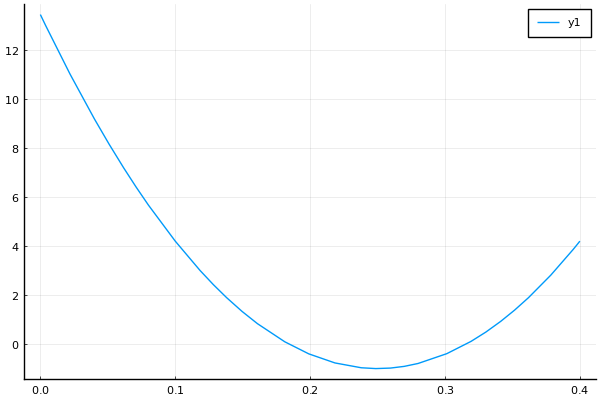

In [ ]:
plot(t->f3(x0[3]+t*d0[3]),0,0.4)

* $\alpha \in (0.2,0.3)$ 

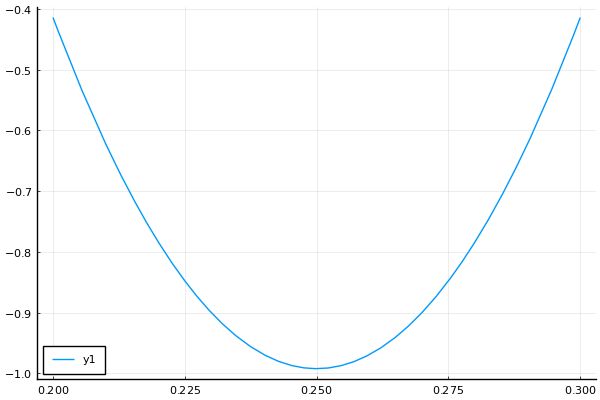

In [ ]:
plot(t->f3(x0[3]+t*d0[3]),0.2,0.3)

4.   <i>Instância 4<i>
* $\alpha \in (0,1)$ 

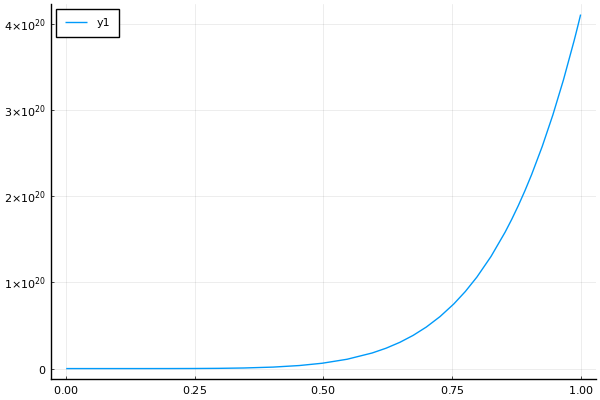

In [ ]:
plot(t->f4(x0[4]+t*d0[4]),0,1)

* $\alpha \in (0,0.1)$ 

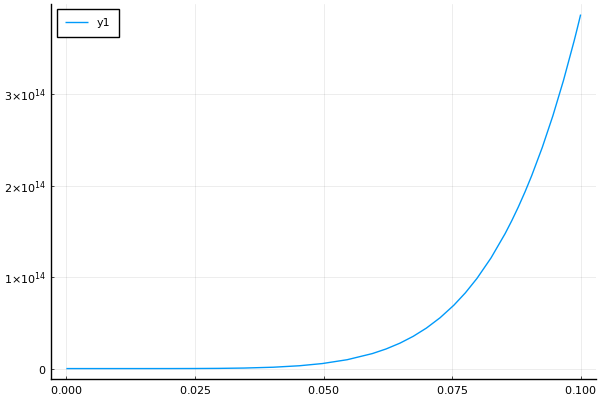

In [ ]:
plot(t->f4(x0[4]+t*d0[4]),0,0.1)

* $\alpha \in (0,0.01)$ 

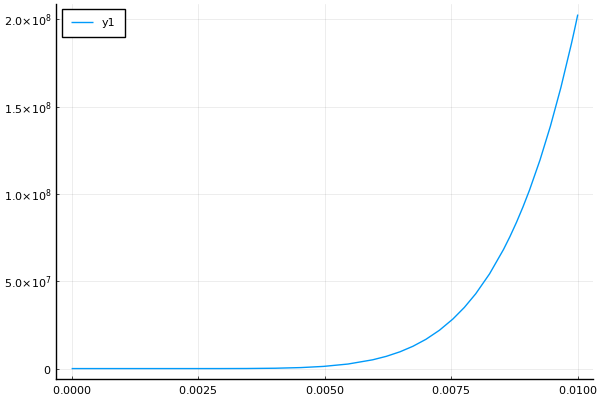

In [ ]:
plot(t->f4(x0[4]+t*d0[4]),0,0.01)

* $\alpha \in (0,0.003)$ 

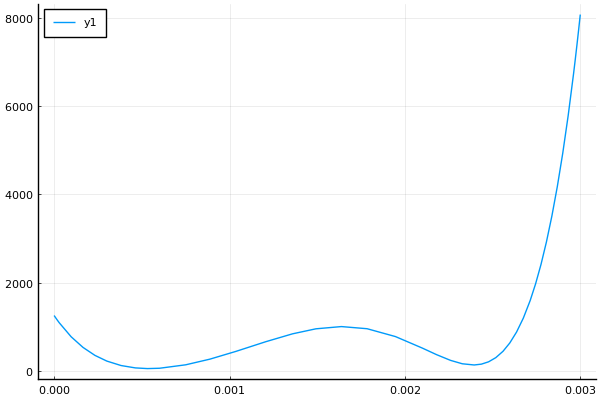

In [ ]:
plot(t->f4(x0[4]+t*d0[4]),0,0.003)

5.   <i>Instância 5<i>
* $\alpha \in (0,1)$  


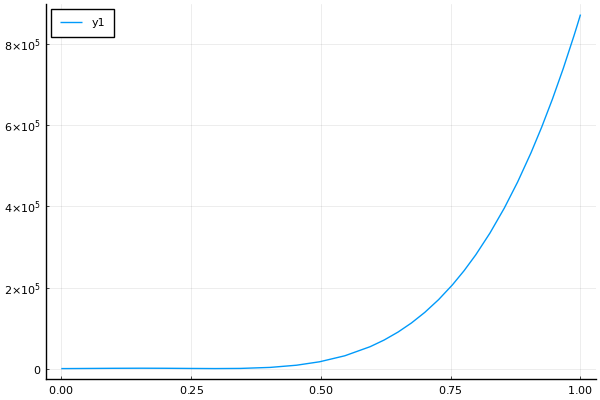

In [ ]:
plot(t->f5(x0[5]+t*d0[5]),0,1)

* $\alpha \in (0,0.5)$ 

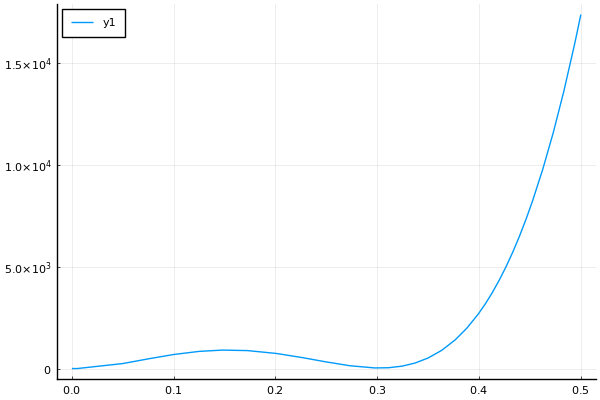

In [ ]:
plot(t->f5(x0[5]+t*d0[5]),0,0.5)

* $\alpha \in (0,0.35)$ 

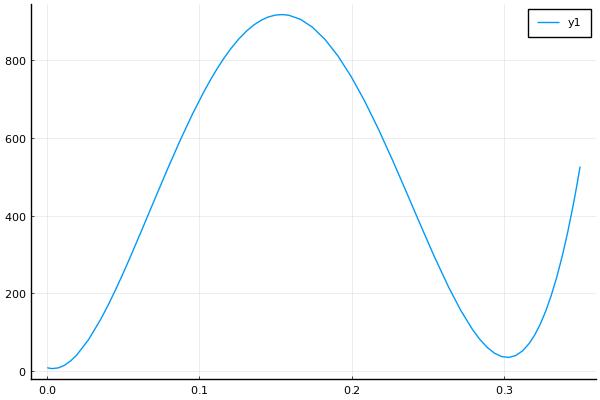

In [ ]:
plot(t->f5(x0[5]+t*d0[5]),0,0.35)

* $\alpha \in (0,0.1)$ 

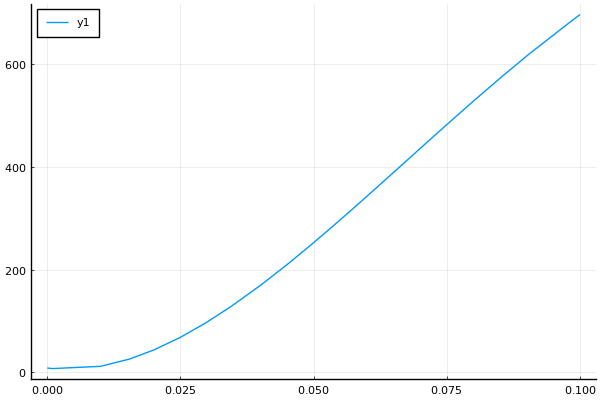

In [ ]:
plot(t->f5(x0[5]+t*d0[5]),0,0.1)

* $\alpha \in (0,0.02)$ 

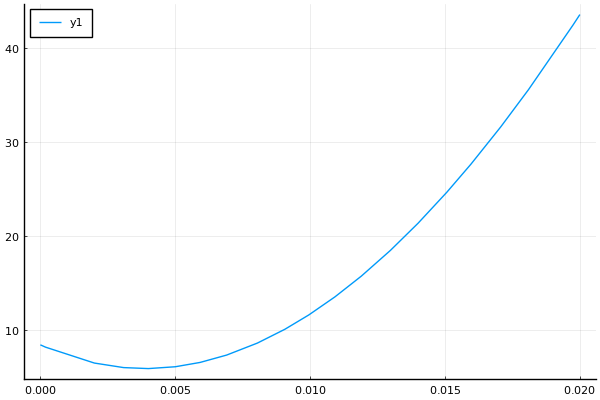

In [ ]:
plot(t->f5(x0[5]+t*d0[5]),0,0.02)

* $\alpha \in (0,0.01)$ 

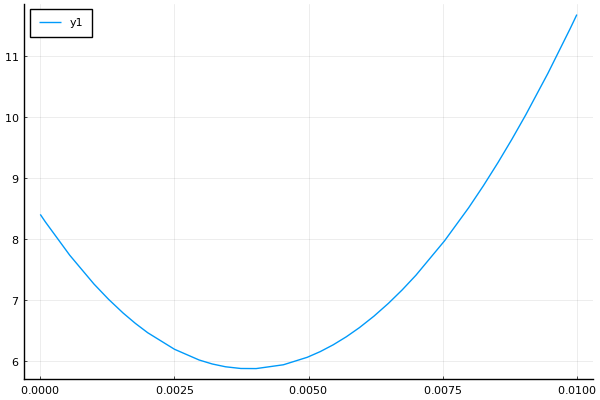

In [ ]:
plot(t->f5(x0[5]+t*d0[5]),0,0.01)

A partir dos gráficos gerados podemos tentar estimar um tamanho de passo inicial para cada instância. Vale levar em consideração que este não necessariamente é bom, em vista que foi feita uma análise visual com intervalos de tamanho de passo empíricos.

##Resultados

Abaixo mostramos o resultados usando os algoritmos do livro-texto com os valores indicados.


In [ ]:
functions = [f1,f2,f3,f4,f5]
methods = [secao_aurea,newton,armijo]
methods_names = ["Seção Aurea","Método de Newton","Condição de Armijo"]
println("----------------------------------------------------------------")
for i = 1:5
    @printf("instancia %d: \n",i)
    println("----------------------------------------------------------------")
    for j = 1:3
       print("Método Usado: ")
       println(methods_names[j])
       println("----------------------------------------------------------------")
       (best_obj,best_point) = linear_search(functions[i],x0[i],d0[i],methods[j]) 
       print("Tamanho passo : ")
       println(methods[j](functions[i],x0[i],d0[i]))
       print("Melhor solução : ")
       println(best_point)
       print("Valor de f na solução : ")
       println(best_obj)
       println("----------------------------------------------------------------")
    end
end

----------------------------------------------------------------
instancia 1: 
----------------------------------------------------------------
Método Usado: Seção Aurea
----------------------------------------------------------------
Tamanho passo : 0.06153484876439707
Melhor solução : [2.707533345633471, 1.5231636296544704]
Valor de f na solução : 0.3653851152608548
----------------------------------------------------------------
Método Usado: Método de Newton
----------------------------------------------------------------
Tamanho passo : 0.06153484884881113
Melhor solução : [2.7075333493476896, 1.523163627628533]
Valor de f na solução : 0.3653851152608547
----------------------------------------------------------------
Método Usado: Condição de Armijo
----------------------------------------------------------------
Tamanho passo : 0.06871947673600004
Melhor solução : [3.023656976384002, 1.350732558335999]
Valor de f na solução : 1.2018466871483395
----------------------------------

Como visto na seção anterior podemos alterar o intervalo dos passos para tentar encontrar mais rápido um minimizador. Além disso veja que para o algoritmos de Seção Aurea o intervalo inicial obtido é muito importante, se olharmos os testes acima em conjunto com os gráficos explorados antes é claro que o intervalo inicial não é unimodal para algumas instâncias, por exemplo na instância 5 a condição de armijo encontrou um valor de função objetivo melhor.  Começando da instância 2 vamos verificar se existe um minimo menor, já que a instância 1 possui solução dentro do melhor intervalo encontrado.

In [ ]:
@printf("instancia %d: \n",2)
    println("----------------------------------------------------------------")
       print("Método Usado: ")
       println(methods_names[1])
       println("----------------------------------------------------------------")
       (best_obj,best_point) = linear_search(functions[2],x0[2],d0[2],(f,x,d)->methods[1](f,x,d,(0.0,0.001))) 
       print("Tamanho passo : ")
       println(methods[1](functions[2],x0[2],d0[2],(0.0,0.001)))
       print("Melhor solução : ")
       println(best_point)
       print("Valor de f na solução : ")
       println(best_obj)
       println("----------------------------------------------------------------")


instancia 2: 
----------------------------------------------------------------
Método Usado: Seção Aurea
----------------------------------------------------------------
Tamanho passo : 0.0003640741011413413
Melhor solução : [-1.452407300056835, 2.117231860567512]
Valor de f na solução : 6.020299905706988
----------------------------------------------------------------


Veja que para instância 2 o mínimo local encontrado pelo métodode Seção Áurea entre (0,0.001) é maior que o encontrado pelo algoritmo padrão. Na terceira instância temos algo bastante interessante, o passo encontrado corresponde com o do gráfico para o intervalo (0.2,0.3). Além disso, vemos que o método de newton não adiciona imprecisão númerica.
A quarta instância permite ver a caracteristica de convergencia para um minimo local do método de newton. Para tanto podemos inicializar o método de Newton com um tamanho de passo inicial de 0.001.


In [ ]:
@printf("instancia %d: \n",4)
    println("----------------------------------------------------------------")
       print("Método Usado: ")
       println(methods_names[2])
       println("----------------------------------------------------------------")
       (best_obj,best_point) = linear_search(functions[4],x0[4],d0[4],(f,x,d)->methods[2](f,x,d,t=0.001)) 
       print("Tamanho passo : ")
       println(methods[2](functions[4],x0[4],d0[4],t=0.001))
       print("Melhor solução : ")
       println(best_point)
       print("Valor de f na solução : ")
       println(best_obj)
       println("----------------------------------------------------------------")


instancia 4: 
----------------------------------------------------------------
Método Usado: Método de Newton
----------------------------------------------------------------
Tamanho passo : 0.000542091623786043
Melhor solução : [14.952295937106829, -0.6816331709523435]
Valor de f na solução : 54.44934251014155
----------------------------------------------------------------


A instância 5 pode ser dita como a que melhor exemplifica a utilidade da condição de armijo. Lembrando, o método de armijo permite encontrar rapidamente soluções com um valor de função objetivo com consideravel redução. No caso, o método de armijo encontrou uma solução melhor que os métodos de Newton e Seção Aurea. Testamos um intervalo entre (0,0.01) e ambos os métodos convergem pontos melhores que o de armijo.

In [ ]:
@printf("instancia %d: \n",5)
       println("----------------------------------------------------------------")
       print("Método Usado: ")
       println(methods_names[1])
       println("----------------------------------------------------------------")
       (best_obj,best_point) = linear_search(functions[5],x0[5],d0[5],(f,x,d)->methods[1](f,x,d,(0.0,0.01)))
       print("Tamanho passo : ")
       println(methods[1](functions[5],x0[5],d0[5],(0.0,0.01)))
       print("Melhor solução : ")
       println(best_point)
       print("Valor de f na solução : ")
       println(best_obj)
       println("----------------------------------------------------------------")
       print("Método Usado: ")
       println(methods_names[2])
       println("----------------------------------------------------------------")
       (best_obj,best_point) = linear_search(functions[5],x0[5],d0[5],(f,x,d)->methods[2](f,x,d,t=0.01)) 
       print("Tamanho passo : ")
       println(methods[2](functions[5],x0[5],d0[5],t=0.01))
       print("Melhor solução : ")
       println(best_point)
       print("Valor de f na solução : ")
       println(best_obj)
       println("----------------------------------------------------------------")


instancia 5: 
----------------------------------------------------------------
Método Usado: Seção Aurea
----------------------------------------------------------------
Tamanho passo : 0.003896506796223006
Melhor solução : [-1.2327306570882732, 1.9423316994158994, 0.12468821747913622]
Valor de f na solução : 5.8732180672986045
----------------------------------------------------------------
Método Usado: Método de Newton
----------------------------------------------------------------
Tamanho passo : 0.003896506761710233
Melhor solução : [-1.232730656798366, 1.9423316999266886, 0.12468821637472749]
Valor de f na solução : 5.8732180672986045
----------------------------------------------------------------


#Referências
 $[1]$ **Ademir A.R.** e **Elizabeth W.K.** (2011). *Um Curso De Otimização. Curitiba.*